In [1]:
import win32api
import win32con

# ShellExecute parameters:
# hwnd (0), operation ("open"), file (executable or shell URI), parameters, directory, show command
win32api.ShellExecute(
    0,
    "open",
    "explorer.exe",
    "shell:Appsfolder\\Microsoft.MicrosoftSolitaireCollection_8wekyb3d8bbwe!App",
    None,
    win32con.SW_SHOWNORMAL
)

42

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Path to your dataset root (each emotion is a subfolder)
DATASET_DIR = 'SampleDataset'  # <-- Change this to your dataset path

# Target image size for CNN input (height, width)
IMG_SIZE = (128,128)  # You can adjust this as needed

# Get sorted list of emotion folders for consistent class indices
emotions = sorted([d for d in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, d))])

# Map emotion folder names to class indices
class_map = {emotion: idx for idx, emotion in enumerate(emotions)}

# Lists to hold processed images and corresponding labels
images = []
labels = []

# Loop through each emotion folder
for emotion in emotions:
    emotion_folder = os.path.join(DATASET_DIR, emotion)
    for img_name in os.listdir(emotion_folder):
        # Only process image files
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            continue
        img_path = os.path.join(emotion_folder, img_name)
        # Read the image
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip unreadable files
        # Resize image to target size
        img_resized = cv2.resize(img, IMG_SIZE)
        # Convert to grayscale
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        # Normalize pixel values to [0, 1]
        img_normalized = img_gray / 255.0
        # Append processed image and its label
        images.append(img_normalized)
        labels.append(class_map[emotion])

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Reshape images to add channel dimension (needed for CNN input: (samples, height, width, channels))
images = images.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)

# Split dataset into training and testing sets (80% train, 20% test, stratified by label)
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# Print dataset shapes for verification
print(f'Training data shape: {X_train.shape}')    # (num_train_samples, 64, 64, 1)
print(f'Testing data shape: {X_test.shape}')      # (num_test_samples, 64, 64, 1)
print(f'Training labels shape: {y_train.shape}')  # (num_train_samples,)
print(f'Testing labels shape: {y_test.shape}')    # (num_test_samples,)
print(f'Class mapping: {class_map}')              # {'angry': 0, 'happy': 1, ...}

# Now X_train, y_train, X_test, y_test are ready for CNN training


Get the images and preprossed and save it in another file


In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Path to your dataset root (each emotion is a subfolder)
DATASET_DIR = 'D:/Group50/Facial_Emotion_Recongnition/Datasets/Preprpcess_Large_Dataset'  # <-- Change this to your dataset path

# Directory to save preprocessed images
PREPROCESSED_DIR = 'Datasets/Dataset_for_CNN'  
# Target image size for CNN input (height, width)
IMG_SIZE = (128,128)  # You can adjust this as needed

# Get sorted list of emotion folders for consistent class indices
emotions = sorted([d for d in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, d))])

# Map emotion folder names to class indices
class_map = {emotion: idx for idx, emotion in enumerate(emotions)}

# Create directory structure for preprocessed images
for emotion in emotions:
    os.makedirs(os.path.join(PREPROCESSED_DIR, emotion), exist_ok=True)

# Lists to hold processed images and corresponding labels (optional, for later use)
images = []
labels = []

# Loop through each emotion folder
for emotion in emotions:
    emotion_folder = os.path.join(DATASET_DIR, emotion)
    save_folder = os.path.join(PREPROCESSED_DIR, emotion)
    for img_name in os.listdir(emotion_folder):
        # Only process image files
        if not img_name.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            continue
        img_path = os.path.join(emotion_folder, img_name)
        # Read the image
        img = cv2.imread(img_path)
        if img is None:
            continue  # Skip unreadable files
        # Resize image to target size
        img_resized = cv2.resize(img, IMG_SIZE)
        # Convert to grayscale
        img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
        # Normalize pixel values to [0, 1]
        img_normalized = img_gray / 255.0
        # Save preprocessed image (scaled back to 0-255 for saving)
        save_path = os.path.join(save_folder, img_name)
        cv2.imwrite(save_path, (img_normalized * 255).astype(np.uint8))
        # Optionally, store in memory for later use
        images.append(img_normalized)
        labels.append(class_map[emotion])

# Convert lists to numpy arrays for CNN input (optional)
images = np.array(images)
labels = np.array(labels)
images = images.reshape(-1, IMG_SIZE[0], IMG_SIZE[1], 1)

# Split dataset into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# Print dataset shapes for verification
print(f'Training data shape: {X_train.shape}')    # (num_train_samples, 64, 64, 1)
print(f'Testing data shape: {X_test.shape}')      # (num_test_samples, 64, 64, 1)
print(f'Training labels shape: {y_train.shape}')  # (num_train_samples,)
print(f'Testing labels shape: {y_test.shape}')    # (num_test_samples,)
print(f'Class mapping: {class_map}')              # {'angry': 0, 'happy': 1, ...}


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [1]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))


AttributeError: type object 'torch._C._distributed_c10d.ProcessGroup' has no attribute 'Options'

Using device: cuda


Epoch 1/50: 100%|██████████| 57/57 [00:15<00:00,  3.60batch/s, loss=1.79]


Epoch 1/50 - Loss: 2.5261 - Val Acc: 0.2694


Epoch 2/50: 100%|██████████| 57/57 [00:15<00:00,  3.64batch/s, loss=1.62]


Epoch 2/50 - Loss: 1.8775 - Val Acc: 0.3361


Epoch 3/50: 100%|██████████| 57/57 [00:15<00:00,  3.67batch/s, loss=1.6] 


Epoch 3/50 - Loss: 1.7145 - Val Acc: 0.3817


Epoch 4/50: 100%|██████████| 57/57 [00:15<00:00,  3.58batch/s, loss=1.61]


Epoch 4/50 - Loss: 1.6366 - Val Acc: 0.4389


Epoch 5/50: 100%|██████████| 57/57 [00:15<00:00,  3.69batch/s, loss=1.54]


Epoch 5/50 - Loss: 1.5722 - Val Acc: 0.4322


Epoch 6/50: 100%|██████████| 57/57 [00:16<00:00,  3.51batch/s, loss=1.9] 


Epoch 6/50 - Loss: 1.5272 - Val Acc: 0.4428


Epoch 7/50: 100%|██████████| 57/57 [00:15<00:00,  3.58batch/s, loss=1.34]


Epoch 7/50 - Loss: 1.4881 - Val Acc: 0.4361


Epoch 8/50: 100%|██████████| 57/57 [00:15<00:00,  3.66batch/s, loss=1.32]


Epoch 8/50 - Loss: 1.4454 - Val Acc: 0.4500


Epoch 9/50: 100%|██████████| 57/57 [00:15<00:00,  3.78batch/s, loss=1.43]


Epoch 9/50 - Loss: 1.4015 - Val Acc: 0.4556


Epoch 10/50: 100%|██████████| 57/57 [00:15<00:00,  3.73batch/s, loss=1.34]


Epoch 10/50 - Loss: 1.3894 - Val Acc: 0.4361


Epoch 11/50: 100%|██████████| 57/57 [00:15<00:00,  3.64batch/s, loss=1.59]


Epoch 11/50 - Loss: 1.3575 - Val Acc: 0.4556


Epoch 12/50: 100%|██████████| 57/57 [00:15<00:00,  3.69batch/s, loss=1.58]


Epoch 12/50 - Loss: 1.3194 - Val Acc: 0.4672


Epoch 13/50: 100%|██████████| 57/57 [00:16<00:00,  3.54batch/s, loss=1.33]


Epoch 13/50 - Loss: 1.2909 - Val Acc: 0.4639


Epoch 14/50: 100%|██████████| 57/57 [00:15<00:00,  3.70batch/s, loss=1.29]


Epoch 14/50 - Loss: 1.2977 - Val Acc: 0.4878


Epoch 15/50: 100%|██████████| 57/57 [00:16<00:00,  3.39batch/s, loss=0.949]


Epoch 15/50 - Loss: 1.2348 - Val Acc: 0.4856


Epoch 16/50: 100%|██████████| 57/57 [00:16<00:00,  3.48batch/s, loss=1.17]


Epoch 16/50 - Loss: 1.2074 - Val Acc: 0.4889


Epoch 17/50: 100%|██████████| 57/57 [00:15<00:00,  3.59batch/s, loss=1.02] 


Epoch 17/50 - Loss: 1.1843 - Val Acc: 0.4900


Epoch 18/50: 100%|██████████| 57/57 [00:15<00:00,  3.73batch/s, loss=1.09] 


Epoch 18/50 - Loss: 1.1644 - Val Acc: 0.4972


Epoch 19/50: 100%|██████████| 57/57 [00:15<00:00,  3.67batch/s, loss=1.29] 


Epoch 19/50 - Loss: 1.1399 - Val Acc: 0.4867


Epoch 20/50: 100%|██████████| 57/57 [00:16<00:00,  3.50batch/s, loss=1.02] 


Epoch 20/50 - Loss: 1.0961 - Val Acc: 0.5011


Epoch 21/50: 100%|██████████| 57/57 [00:15<00:00,  3.69batch/s, loss=0.843]


Epoch 21/50 - Loss: 1.0942 - Val Acc: 0.5078


Epoch 22/50: 100%|██████████| 57/57 [00:15<00:00,  3.58batch/s, loss=1.13] 


Epoch 22/50 - Loss: 1.0453 - Val Acc: 0.5028


Epoch 23/50: 100%|██████████| 57/57 [00:16<00:00,  3.39batch/s, loss=0.791]


Epoch 23/50 - Loss: 0.9969 - Val Acc: 0.5111


Epoch 24/50: 100%|██████████| 57/57 [00:16<00:00,  3.45batch/s, loss=1.01] 


Epoch 24/50 - Loss: 0.9650 - Val Acc: 0.5233


Epoch 25/50: 100%|██████████| 57/57 [00:15<00:00,  3.60batch/s, loss=1.09] 


Epoch 25/50 - Loss: 0.9147 - Val Acc: 0.5128


Epoch 26/50: 100%|██████████| 57/57 [00:15<00:00,  3.58batch/s, loss=0.606]


Epoch 26/50 - Loss: 0.9098 - Val Acc: 0.5161


Epoch 27/50: 100%|██████████| 57/57 [00:15<00:00,  3.68batch/s, loss=0.766]


Epoch 27/50 - Loss: 0.8877 - Val Acc: 0.5272


Epoch 28/50: 100%|██████████| 57/57 [00:15<00:00,  3.64batch/s, loss=0.678]


Epoch 28/50 - Loss: 0.8790 - Val Acc: 0.5311


Epoch 29/50: 100%|██████████| 57/57 [00:15<00:00,  3.73batch/s, loss=0.532]


Epoch 29/50 - Loss: 0.8274 - Val Acc: 0.5250


Epoch 30/50: 100%|██████████| 57/57 [00:15<00:00,  3.68batch/s, loss=0.832]


Epoch 30/50 - Loss: 0.8143 - Val Acc: 0.5161


Epoch 31/50: 100%|██████████| 57/57 [00:15<00:00,  3.60batch/s, loss=0.818]


Epoch 31/50 - Loss: 0.7829 - Val Acc: 0.5322


Epoch 32/50: 100%|██████████| 57/57 [00:15<00:00,  3.66batch/s, loss=0.764]


Epoch 32/50 - Loss: 0.7944 - Val Acc: 0.5233


Epoch 33/50: 100%|██████████| 57/57 [00:14<00:00,  3.82batch/s, loss=0.809]


Epoch 33/50 - Loss: 0.7739 - Val Acc: 0.5194


Epoch 34/50: 100%|██████████| 57/57 [00:15<00:00,  3.65batch/s, loss=0.732]


Epoch 34/50 - Loss: 0.7337 - Val Acc: 0.5272


Epoch 35/50: 100%|██████████| 57/57 [00:15<00:00,  3.61batch/s, loss=0.568]


Epoch 35/50 - Loss: 0.7211 - Val Acc: 0.5183


Epoch 36/50: 100%|██████████| 57/57 [00:15<00:00,  3.68batch/s, loss=0.894]


Epoch 36/50 - Loss: 0.7065 - Val Acc: 0.5267


Epoch 37/50: 100%|██████████| 57/57 [00:15<00:00,  3.63batch/s, loss=0.562]


Epoch 37/50 - Loss: 0.6872 - Val Acc: 0.5194


Epoch 38/50: 100%|██████████| 57/57 [00:16<00:00,  3.46batch/s, loss=0.869]


Epoch 38/50 - Loss: 0.6889 - Val Acc: 0.5139


Epoch 39/50: 100%|██████████| 57/57 [00:15<00:00,  3.60batch/s, loss=0.55] 


Epoch 39/50 - Loss: 0.6820 - Val Acc: 0.5111


Epoch 40/50: 100%|██████████| 57/57 [00:15<00:00,  3.61batch/s, loss=0.63] 


Epoch 40/50 - Loss: 0.6582 - Val Acc: 0.5228


Epoch 41/50: 100%|██████████| 57/57 [00:15<00:00,  3.70batch/s, loss=0.722]


Epoch 41/50 - Loss: 0.6392 - Val Acc: 0.5217


Epoch 42/50: 100%|██████████| 57/57 [00:15<00:00,  3.66batch/s, loss=0.451]


Epoch 42/50 - Loss: 0.6322 - Val Acc: 0.5189


Epoch 43/50: 100%|██████████| 57/57 [00:15<00:00,  3.62batch/s, loss=0.619]


Epoch 43/50 - Loss: 0.6124 - Val Acc: 0.5228


Epoch 44/50: 100%|██████████| 57/57 [00:15<00:00,  3.61batch/s, loss=0.925]


Epoch 44/50 - Loss: 0.6029 - Val Acc: 0.5244


Epoch 45/50: 100%|██████████| 57/57 [00:15<00:00,  3.73batch/s, loss=0.539]


Epoch 45/50 - Loss: 0.6195 - Val Acc: 0.5289


Epoch 46/50: 100%|██████████| 57/57 [00:14<00:00,  3.99batch/s, loss=0.759]


Epoch 46/50 - Loss: 0.6044 - Val Acc: 0.5217


Epoch 47/50: 100%|██████████| 57/57 [00:15<00:00,  3.61batch/s, loss=0.252]


Epoch 47/50 - Loss: 0.5778 - Val Acc: 0.5156


Epoch 48/50: 100%|██████████| 57/57 [00:15<00:00,  3.63batch/s, loss=0.845]


Epoch 48/50 - Loss: 0.5708 - Val Acc: 0.5228


Epoch 49/50: 100%|██████████| 57/57 [00:15<00:00,  3.73batch/s, loss=0.69] 


Epoch 49/50 - Loss: 0.5626 - Val Acc: 0.5111


Epoch 50/50: 100%|██████████| 57/57 [00:15<00:00,  3.65batch/s, loss=0.426]


Epoch 50/50 - Loss: 0.5432 - Val Acc: 0.5150


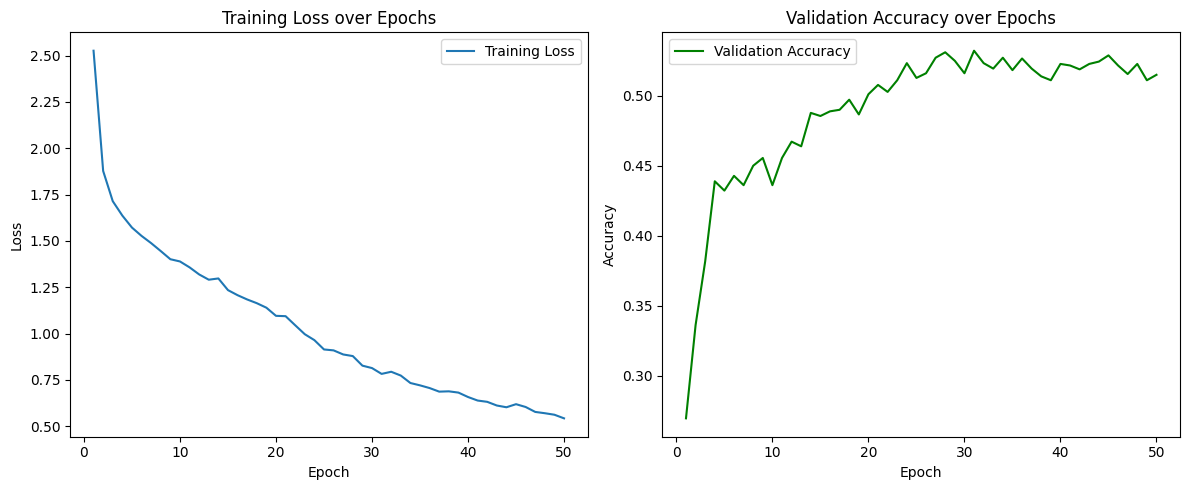

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set device to CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Parameters
IMG_SIZE = 64
BATCH_SIZE = 128
EPOCHS = 50
DATASET_DIR = '/mnt/d/Group50/Facial_Emotion_Recongnition/SampleDataset/train'  # Your preprocessed images
NUM_CLASSES = 9

# Custom Dataset
class EmotionDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.samples = []
        self.labels = []
        self.transform = transform
        self.class_map = {name: idx for idx, name in enumerate(sorted(os.listdir(root_dir)))}
        for emotion in self.class_map:
            folder = os.path.join(root_dir, emotion)
            for fname in os.listdir(folder):
                if fname.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
                    self.samples.append(os.path.join(folder, fname))
                    self.labels.append(self.class_map[emotion])

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        img = cv2.imread(self.samples[idx], cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        if self.transform:
            img = self.transform(img)
        else:
            img = torch.tensor(img, dtype=torch.float32).unsqueeze(0) / 255.0
        label = self.labels[idx]
        return img, label

# Data transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts HxW [0,255] to 1xHxW [0,1]
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1, 1]
])

# Prepare dataset and dataloaders
full_dataset = EmotionDataset(DATASET_DIR, transform=transform)
indices = np.arange(len(full_dataset))
train_idx, val_idx = train_test_split(indices, test_size=0.2, stratify=full_dataset.labels, random_state=42)
train_set = torch.utils.data.Subset(full_dataset, train_idx)
val_set = torch.utils.data.Subset(full_dataset, val_idx)

train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

# Optimized CNN Model
class EmotionCNN(nn.Module):
    def __init__(self, num_classes):
        super(EmotionCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2), nn.Dropout(0.25),

            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2), nn.Dropout(0.25)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * (IMG_SIZE//4) * (IMG_SIZE//4), 256), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = EmotionCNN(NUM_CLASSES).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_accuracies = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0

    # Wrap train_loader with tqdm for progress bar
    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS}", unit="batch") as tepoch:
        for imgs, labels in tepoch:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * imgs.size(0)
            tepoch.set_postfix(loss=loss.item())

    avg_loss = running_loss / len(train_loader.dataset)
    train_losses.append(avg_loss)

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = correct / total
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {avg_loss:.4f} - Val Acc: {val_acc:.4f}")

# Plot training loss and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, EPOCHS+1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, EPOCHS+1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

In [2]:
# save the model
torch.save(model.state_dict(), 'emotion_model.pth')

# quantize and save
from torch.quantization import quantize_dynamic
quantized_model = quantize_dynamic(model, {torch.nn.Linear}, dtype=torch.qint8)
torch.save(quantized_model.state_dict(), 'quantized_emotion_model.pth')

In [6]:
IMG_SIZE = 128
BATCH_SIZE = 128
EPOCHS = 100
DATASET_DIR = '/mnt/d/Group50/Facial_Emotion_Recongnition/SampleDataset/train'  # Your preprocessed images
NUM_CLASSES = 9


# Optimized CNN Model
class EmotionCNN(nn.Module):
    def __init__(self, num_classes):
        super(EmotionCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2), nn.Dropout(0.25),

            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2), nn.Dropout(0.25)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * (IMG_SIZE//4) * (IMG_SIZE//4), 256), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

model = EmotionCNN(NUM_CLASSES).to(device)

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import cv2
import numpy as np

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Class labels (update to match your dataset folder order)
class_labels = ['Angry', 'Boring', 'Disgust', 'Fear', 'Happy', 'Neural', 'Sad', 'Stress', 'Suprise']

# Model definition (must match training)
class EmotionCNN(nn.Module):
    def __init__(self, num_classes):
        super(EmotionCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2), nn.Dropout(0.25),

            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2), nn.Dropout(0.25)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 32 * 32, 256), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Load model
model = EmotionCNN(len(class_labels)).to(device)
model.load_state_dict(torch.load("emotion_model_for_128_100_epoch.pth", map_location=device))
model.eval()

# Preprocessing for webcam frames
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)
print("Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    for (x, y, w, h) in faces:
        face = gray[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (128, 128))
        face_tensor = transform(face_resized).unsqueeze(0).to(device)
        with torch.no_grad():
            output = model(face_tensor)
            pred = torch.argmax(output, 1).item()
            label = class_labels[pred]
        color = (0, 255, 0)
        cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    cv2.imshow('Webcam Emotion Recognition', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


Press 'q' to quit.


In [ ]:
model.save('emotion_model.keras')  # Keras format recommended[5][6]


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import cv2
import numpy as np

# Model definition (must match training)
class EmotionCNN(nn.Module):
    def __init__(self, num_classes):
        super(EmotionCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2), nn.Dropout(0.25),

            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2), nn.Dropout(0.25)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

Sample Real-Time Inference Code:

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from torchvision import transforms
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
NUM_CLASSES = 9
emotion_dict = {0: "Angry", 1: "Boring", 2: "Disgust", 3: "Fear", 4: "Happy", 5: "Neutral", 6: "Sad", 7: "Stress", 8: "Surprise"}
model = EmotionCNN(NUM_CLASSES).to(device)

# Load the saved weights
model = torch.load("emotion_cnn_best.pth")
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(),  # Ensure it's 1 channel
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Webcam capture
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess full frame
    frame_resized = cv2.resize(frame, (64, 64))
    input_tensor = transform(frame_resized).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        outputs = model(input_tensor)
        probs = F.softmax(outputs, dim=1)
        predicted = torch.argmax(probs, 1).item()
        emotion = emotion_dict[predicted]

    # Display result
    cv2.putText(frame, emotion, (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Emotion Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import cv2
import numpy as np

# Define model
class EmotionCNN(nn.Module):
    def __init__(self, num_classes):
        super(EmotionCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32, 64, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2), nn.Dropout(0.25),

            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2), nn.Dropout(0.25)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128 * 16 * 16, 256), nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load model
NUM_CLASSES = 9
emotion_dict = {
    0: "Angry", 1: "Boring", 2: "Disgust", 3: "Fear",
    4: "Happy", 5: "Neutral", 6: "Sad", 7: "Stress", 8: "Surprise"
}
model = EmotionCNN(NUM_CLASSES).to(device)
model.load_state_dict(torch.load("emotion_cnn_best.pth", map_location=device))
model.eval()

# Image transform
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(),
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Start webcam
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Resize full frame
    frame_resized = cv2.resize(frame, (64, 64))
    input_tensor = transform(frame_resized).unsqueeze(0).to(device)

    # Predict emotion
    with torch.no_grad():
        outputs = model(input_tensor)
        probs = F.softmax(outputs, dim=1)
        predicted = torch.argmax(probs, 1).item()
        emotion = emotion_dict[predicted]

    # Show prediction on original frame
    cv2.putText(frame, emotion, (30, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow("Emotion Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import tensorflow as tf

# Convert to TFLite with float16 quantization
converter = tf.lite.TFLiteConverter.from_saved_model('emotion_model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]
tflite_quant_model = converter.convert()
with open('emotion_model_float16.tflite', 'wb') as f:
    f.write(tflite_quant_model)

# For int8 quantization (requires representative dataset)
def representative_dataset():
    for data in dataset.take(100):
        yield [data.astype(np.float32)]
converter.representative_dataset = representative_dataset
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
tflite_quant_model = converter.convert()
with open('emotion_model_int8.tflite', 'wb') as f:
    f.write(tflite_quant_model)
